# Life expectancy around the world


Import libraries

In [1]:
# Additional packages needed to show map plots
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import Polygon
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

Load data

In [2]:
life_df = pd.read_csv('life expectancy.csv' )

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
lifetoyear_df = life_df.loc[life_df['Indicator_Code'] == 'SP.DYN.LE00.IN']
REGION_CODE = ['WLD', 'EAS', 'ECS', 'LCN', 'MEA', 'NAC', 'SAS', 'SSF']
EU_CODE = ['AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 
           'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX',
           'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP', 'SWE', 'GBR']

## Table of Content
* [Worldwide life expectancy](#worldLifeExp)
    * [Life expectancy map in 1960 and 2015](#map)
    * [Average lif expectancy for sub regions](#subRegion)
* [Economy and Life Expectancy](#economy)
    * [Better Disease Prevention](#disease)
        * [Vaccination](#vaccination)
        * [Sanitation](#sanitation)
    * [Health Expenditure](#expense)
* [Possible Downside](#downside)
    * [Living with disability](#disability)
* [Thoughts](#thoughts)


## <a name="worldLifeExp"></a>Worldwide life expectancy
The life expectancy is rising worldwide.

### <a name="map"></a> Life expectancy map in 1960 and 2015.

The average life expectancy has rised from 52.6 in 1960 to 71.9 in 2015.

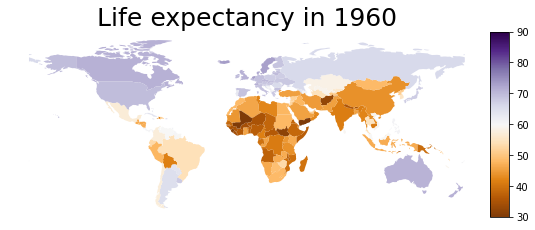

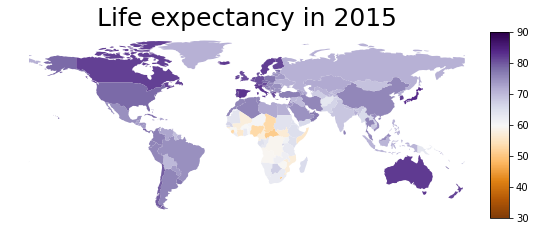

In [4]:
merged = world.set_index('iso_a3').join(lifetoyear_df.set_index('Country_Code'))
VMIN = 30
VMAX = 90
fig, ax = plt.subplots(1, figsize = (9, 6))
merged.plot(column = '1960',cmap = 'PuOr', ax = ax,norm = plt.Normalize(vmin = VMIN, vmax = VMAX))
ax.axis('off')
ax.set_title('Life expectancy in 1960', fontdict={'fontsize':'25', 'fontweight':'3'})
sm = plt.cm.ScalarMappable(cmap='PuOr', norm = plt.Normalize(vmin = VMIN, vmax = VMAX))
sm._A = []
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad = 0.04)
cbar = fig.colorbar(sm, cax = cax)
fig, ax = plt.subplots(1, figsize = (9, 6))
merged.plot(column = '2015', cmap = 'PuOr', ax = ax, norm = plt.Normalize(vmin = VMIN, vmax = VMAX))
ax.axis('off')
ax.set_title('Life expectancy in 2015', fontdict={'fontsize':'25', 'fontweight':'3'})
sm = plt.cm.ScalarMappable(cmap='PuOr', norm = plt.Normalize(vmin = VMIN, vmax = VMAX))
sm._A = []
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad = 0.04)
cbar = fig.colorbar(sm, cax = cax)

### <a name = "subRegion"></a>Average life expectancy for sub regions

The table below shows that all the regions have seen a steady increase. Especially, the Middle East & North Africa region saw the biggest rise from 46.4 to 73.5.

In [5]:
region_le_df = lifetoyear_df[lifetoyear_df['Country_Code'].isin(REGION_CODE)].T.reset_index()
region_le_df.columns = region_le_df.iloc[0]
df_to_show = region_le_df.iloc[4:].T
df_to_show.columns = df_to_show.iloc[0]
df_to_show[1:]

Country_Name,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015
0,,,,,,,,,,,,
East Asia & Pacific,48.415899,53.11546,59.739851,63.514712,66.144156,67.904085,68.927543,69.796301,71.171919,72.624621,74.012997,75.392557
Europe & Central Asia,67.026542,68.290798,68.969236,69.583218,70.168347,71.156816,72.051582,71.71002,73.030945,74.12096,75.940685,77.240962
Latin America & Caribbean,56.077667,58.296374,60.435448,62.63051,64.651838,66.523289,68.313726,70.03639,71.687395,73.060539,74.097251,74.961722
Middle East & North Africa,46.441644,49.419874,52.732543,56.136749,58.637164,61.616092,65.769985,68.254033,69.887256,71.310031,72.539183,73.514845
North America,69.893604,70.366722,70.98548,72.693615,73.752431,74.740245,75.435045,75.8606,76.881996,77.754082,78.80946,79.012208
South Asia,42.120208,45.232225,48.070168,51.070608,53.958844,56.008944,58.144801,60.589855,62.823983,64.783171,66.848769,68.641901
Sub-Saharan Africa,40.377898,42.495961,44.507985,46.599778,48.445014,49.852897,50.214574,50.047626,50.450214,52.886428,56.72547,59.952831
World,52.578367,55.35111,58.583186,60.98673,62.84167,64.279053,65.433407,66.278169,67.549249,68.920304,70.55616,71.947403


Below are the plots for all the regions, including world average.

Text(0.5, 0.98, 'Average Life Expectancy of Different Regions')

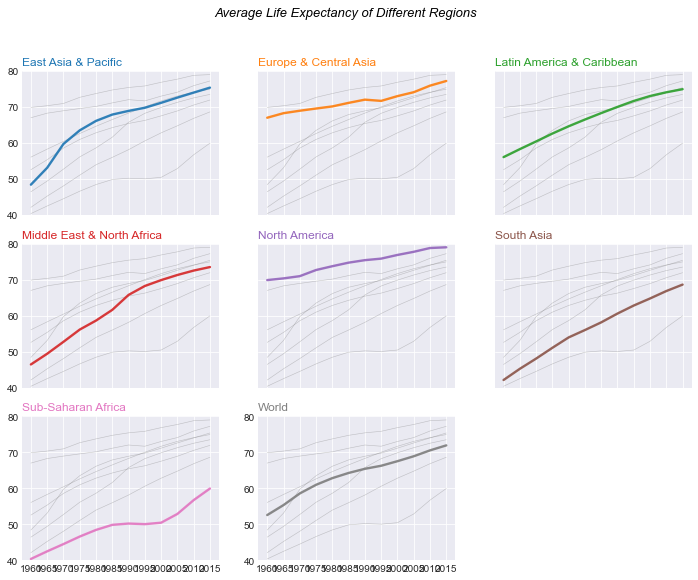

In [6]:
# highlight one region on a plot of all the regions
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('tab10')
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(12,9))
num=0
fig.delaxes(axs[2][2])
for column in region_le_df.drop('Country_Name' , axis=1):
    r, c = num // 3, num % 3
    for v in region_le_df.drop('Country_Name', axis=1):
        axs[r, c].plot(region_le_df['Country_Name'][4:], region_le_df[v][4:], marker='', color='grey', linewidth=0.6, alpha=0.4)    
    axs[r, c].plot(region_le_df['Country_Name'][4:], region_le_df[column][4:], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column) 
    if num in range(5) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off') 
    axs[r, c].set_title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
    axs[r, c].set_ylim(40, 80)    
    num+=1
plt.suptitle("Average Life Expectancy of Different Regions", fontsize=13, fontweight=0, color='black', style='italic')

## <a name = "economy"></a> Economy and Life Expectancy

The main reasons for the longer life is the rapid development of sciece and technology, and the related boosts in economy and life standard. Below shows the life expectancy vs GDP (per capita) for every country in 1960 and 2015, which could be in a logarithm relation.

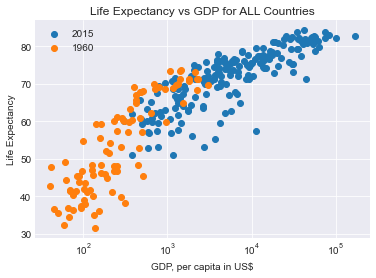

In [7]:
gdpbyc_df = life_df[658:].query("Indicator_Code == 'NY.GDP.PCAP.CD'")
lebyc_df = life_df[658:].query("Indicator_Code == 'SP.DYN.LE00.IN'")
plt.scatter(gdpbyc_df['2015'], lebyc_df['2015'], label = '2015')
plt.scatter(gdpbyc_df['1960'], lebyc_df['1960'], label = '1960')
plt.legend(loc="upper left")
plt.title('Life Expectancy vs GDP for ALL Countries')
plt.xlabel('GDP, per capita in US$')
plt.ylabel('Life Expectancy')
plt.xscale('log')

Below could be some of the influences brought by the development.

### <a name = "disease"></a> Better Disease Prevention
Before modern medicine, contagious disease had a remarkablly higher death rate. According to medieval historian Philip Daileader, the Black Death killed 45-50% Europeans over four years. The 1918 Pandemic claimed 50 million souls worldwide. To combat these deases, some vaccines was invented and people now practice better sanitation.

#### <a name = "vaccination"></a> Vaccination
Below show the average percentage of children ages 12-23 months that take listed vaccine. The percentage is quite encouraging, and it is quite close to the percentage of people needed to be vaccined to achieve herd immunity.

Text(0, 0.5, '% of Children')

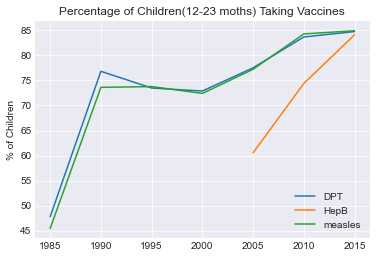

In [8]:
wldim_df = life_df.query("Country_Code == 'WLD'").query("Indicator_Code in ['SH.IMM.IDPT', 'SH.IMM.HEPB', 'SH.IMM.MEAS']").T
#wldim_df.head(20)
plt.plot(wldim_df[648][8:], label = 'DPT')
plt.plot(wldim_df[649][8:], label = 'HepB')
plt.plot(wldim_df[650][8:], label = 'measles')
plt.legend(loc = 'lower right')
plt.title('Percentage of Children(12-23 moths) Taking Vaccines')
plt.ylabel('% of Children')

#### <a name = "sanitation"></a> Sanitation
The graph below shows the percentage of people having access to drinking water and sanitation services.There is still a large percentage of people not having access to safely managed services.

Text(0, 0.5, '% of people')

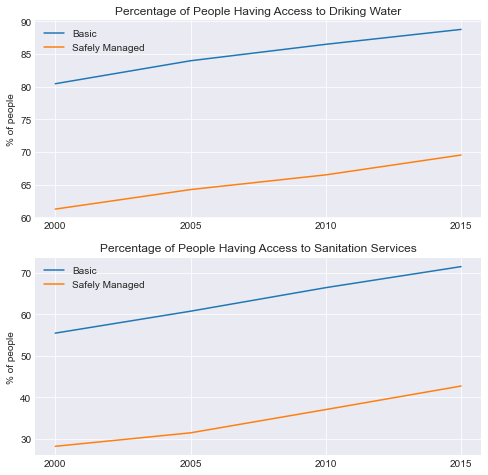

In [9]:
wldsn_df = life_df[653:657].T

fig, axs = plt.subplots(2,figsize=(8,8))
axs[0].plot(wldsn_df[653][12:], label = 'Basic')
axs[0].plot(wldsn_df[655][12:], label = 'Safely Managed')
axs[0].legend(loc = 'upper left')
axs[0].set_title('Percentage of People Having Access to Driking Water')
axs[0].set_ylabel('% of people')
axs[0].tick_params(labelbottom='off')
axs[1].plot(wldsn_df[654][12:], label = 'Basic')
axs[1].plot(wldsn_df[656][12:], label = 'Safely Managed')
axs[1].legend(loc = 'upper left')
axs[1].set_title('Percentage of People Having Access to Sanitation Services')
axs[1].set_ylabel('% of people')

### <a name = "expense"></a> Health Expenditure
In this diagram, the life expectancy and current health expenditure per capita of all country from the year of 2015 are drawn. And they may have a logarithm relation.

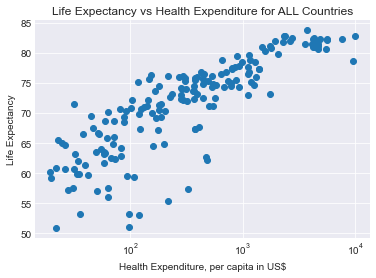

In [10]:
hce_df = life_df[658:].query("Indicator_Code == 'SH.XPD.CHEX.PC.CD'")
plt.scatter(hce_df['2015'], lebyc_df['2015'])
plt.title('Life Expectancy vs Health Expenditure for ALL Countries')
plt.xlabel('Health Expenditure, per capita in US$')
plt.ylabel('Life Expectancy')
plt.xscale('log')

## <a name = "downside"></a>Possible Downside
It is always encouraging to be able to live longer. However, its does not come without any prices.

### <a name = "disability"></a>Living with disability
While people live longer years of healthy life, they will have longer years to live with disabilities. 

In [11]:
from matplotlib import rc
ld_df = pd.read_csv('healthy-life-expectancy-and-years-lived-with-disability.csv' )

Text(0.5, 1.0, 'Break down of life expectancy')

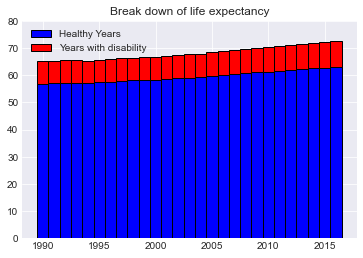

In [12]:
wldld_df = ld_df.query(" Code == 'OWID_WRL'")
plt.bar(wldld_df['Year'], wldld_df['Healthy Life Expectancy (IHME)'], color='blue', edgecolor='black', width=1, label = 'Healthy Years')
plt.bar(wldld_df['Year'], wldld_df['Years Lived With Disability (IHME)'], bottom = wldld_df['Healthy Life Expectancy (IHME)'], color='red', edgecolor='black', width=1, label = 'Years with disability')
plt.legend(loc = 'best')
plt.ylim(0, 80)
plt.title('Break down of life expectancy')

Compare to the significant increase of healthy years, the years living with disability did not seem to change much. However, in the following diagram, it is clear that the ratio of living with disability to health life expectancy is pretty stable, or even slightly increasing as people live longer.

(0.1, 0.2)

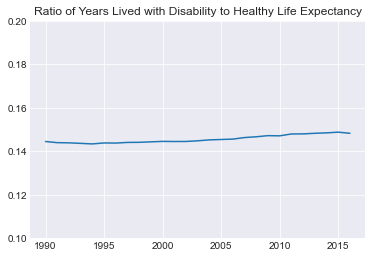

In [13]:
plt.plot(wldld_df['Year'], wldld_df['Years Lived With Disability (IHME)']/wldld_df['Healthy Life Expectancy (IHME)'] )
plt.title('Ratio of Years Lived with Disability to Healthy Life Expectancy')
plt.ylim(0.1, 0.2)

## <a name = "thoughts"></a>Thoughts
Though living longer seems tempting, it requirs increasingly larger amount of investment, as the life expectancy has a roughly logarithm relation with health expenditure. If we can spare some of the expense from the high spending countries to countries with poor conditions, like with low coverage of safely managed drinking water and sanitation services, we would see a boost in the world average life expectancy.

Also, we hope with the development of science and technology, people will have to endure less time with disability, and can be more independent even with disability.